In [1]:
#call magic function
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math

plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
#,dtype={'X33': np.str, 'X34': np.str}
data=pd.read_csv("D:/competition/sample/datasample.csv",encoding='BIG5')
data.columns=["acc"+str(i) for i in range(1,40) ]
#data.acc31=data.acc31.astype(np.int64)
#data.acc30=data.acc30.astype(float)
data.rename(columns={ data.columns[38]: "i_mailbox" }, inplace=True)
data.head()
#df = df.sample(frac=1)

,acc1,acc2,acc3,acc4,acc5,acc6,acc7,acc8,acc9,acc10,...,acc30,acc31,acc32,acc33,acc34,acc35,acc36,acc37,acc38,i_mailbox
0,900032.0,0,1,1,0,1070102,100436.0,900999,NaN,0,...,1,608.0,1,3.13E+13,3.13E+13,56.0,F,10701,1,0
1,330012.0,0,1,1,0,1070102,100634.0,330999,NaN,0,...,1,1853.0,1,6.96E+13,6.96E+13,52.0,F,10701,1,1
2,400050.0,0,1,1,0,1070102,100800.0,400999,NaN,0,...,1,24.0,1,9.68E+19,9.68E+19,NaN,NaN,10701,1,0
3,360006.0,0,1,1,0,1070102,101100.0,360999,NaN,0,...,1,12510.0,1,1.54E+13,1.54E+13,54.0,F,10701,1,0
4,260025.0,0,1,1,0,1070102,101200.0,260999,NaN,0,...,1,15.0,1,9.27E+19,9.27E+19,NaN,NaN,10701,1,0


In [3]:
datasample=data[["acc2","acc10","acc12","acc15","acc16","acc17","acc19","acc21","acc22","acc23","acc24","acc29"
             ,"acc32","i_mailbox",]].copy()
#假設上班時間為8:30~17:30
datasample["office_time"]=data.acc7.apply(lambda x: 1 if x<83000 or x>173000 else 0)
datasample["unit_weight"]=data.acc31/data.acc30
datasample.head()

,acc2,acc10,acc12,acc15,acc16,acc17,acc19,acc21,acc22,acc23,acc24,acc29,acc32,i_mailbox,office_time,unit_weight
0,0,0,2,0,0,0,0,0,1,0,0,5,1,0,0,608.0
1,0,0,2,0,0,0,0,0,1,0,0,5,1,1,0,1853.0
2,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,24.0
3,0,0,2,0,0,0,0,0,1,0,0,5,1,0,0,12510.0
4,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,15.0


In [4]:
print(datasample.shape[0])
print(datasample.shape[0]-datasample.count())
print(datasample.acc10.value_counts() )

24000
acc2           0
acc10          0
acc12          0
acc15          0
acc16          0
acc17          0
acc19          0
acc21          0
acc22          0
acc23          0
acc24          0
acc29          0
acc32          0
i_mailbox      0
office_time    0
unit_weight    0
dtype: int64
0    23997
1        3
Name: acc10, dtype: int64


In [5]:
print(datasample.acc10.value_counts() )
print(datasample.acc12.value_counts() )
print(datasample.acc16.value_counts() )
print(datasample.acc24.value_counts() )
print(datasample.acc29.value_counts() )

0    23997
1        3
Name: acc10, dtype: int64
1    15952
2     7452
3      596
Name: acc12, dtype: int64
0    23569
1      404
2       15
3        8
4        4
Name: acc16, dtype: int64
0    23878
2       65
1       47
3       10
Name: acc24, dtype: int64
1    17908
5     2988
3     2688
6      402
4       14
Name: acc29, dtype: int64


In [6]:
dummy_ranks29 = pd.get_dummies(datasample['acc29'], prefix='acc29') #1 3 4 5 6
#dummy_ranks10 = pd.get_dummies(datasample['acc10'], prefix='acc10') #0 1
dummy_ranks12 = pd.get_dummies(datasample['acc12'], prefix='acc12') #1 2 3
dummy_ranks16 = pd.get_dummies(datasample['acc16'], prefix='acc16') #0 1 2 3 4 
dummy_ranks24 = pd.get_dummies(datasample['acc24'], prefix='acc24') #0 1 2 3 
datasample=(datasample.drop("acc12",axis=1)).join(dummy_ranks12.ix[:,:'acc12_2'])
datasample=(datasample.drop("acc16",axis=1)).join(dummy_ranks16.ix[:,:'acc16_3'])
datasample=(datasample.drop("acc24",axis=1)).join(dummy_ranks24.ix[:,:'acc24_2'])
datasample=(datasample.drop("acc29",axis=1)).join(dummy_ranks29.ix[:,:'acc29_5'])
datasample.head()

D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  import sys
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: 
.ix is

,acc2,acc10,acc15,acc17,acc19,acc21,acc22,acc23,acc32,i_mailbox,...,acc16_1,acc16_2,acc16_3,acc24_0,acc24_1,acc24_2,acc29_1,acc29_3,acc29_4,acc29_5
0,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,0,0,0,1
2,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
3,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,1
4,0,0,0,0,0,0,1,1,1,0,...,0,0,0,1,0,0,1,0,0,0


目標1:二項羅吉特模式

相關係數低於0.3表示低相關

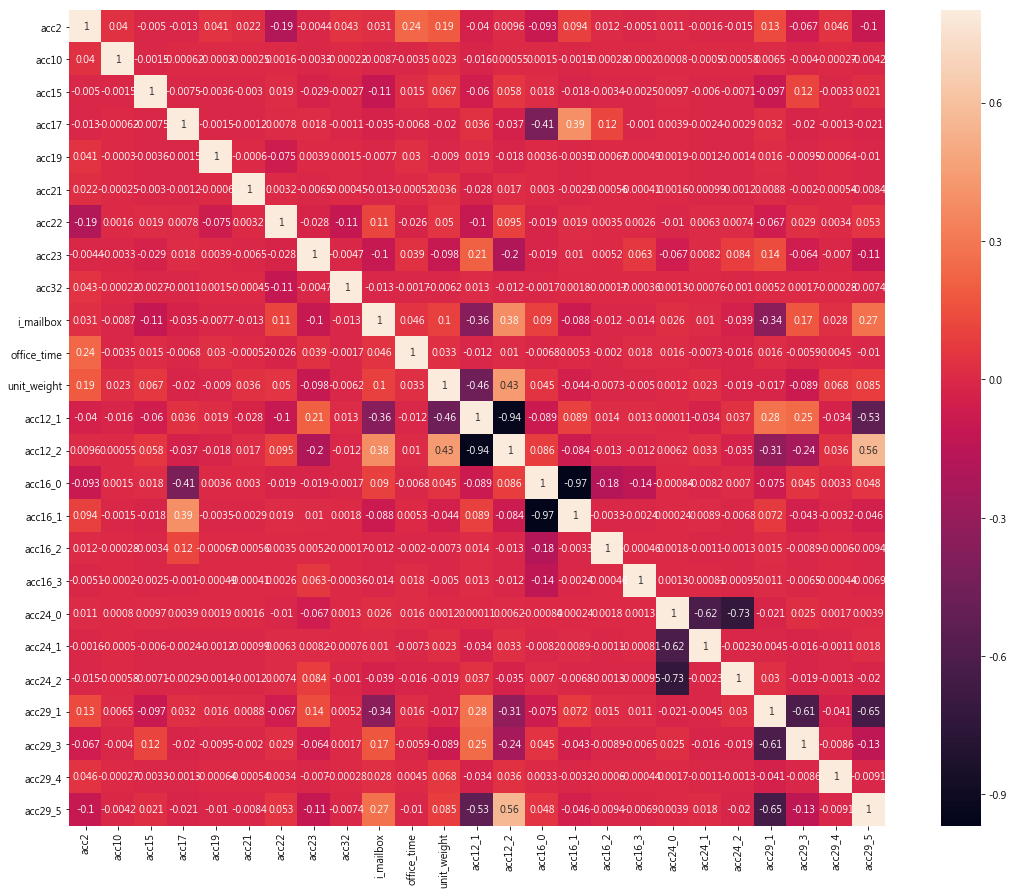

In [7]:
import seaborn as sns
corrmat=datasample.corr()
f,ax = plt.subplots(figsize=(20,15))
sns.heatmap(corrmat,vmax=0.8,square=True,annot=True,annot_kws={'size':10})

In [8]:
#https://zhuanlan.zhihu.com/p/27699336
import statsmodels.api as sm
logitsample=datasample.copy()
logitsample=sm.add_constant(logitsample)
logitsample.columns

D:\anaconda\envs\python36\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Index(['const', 'acc2', 'acc10', 'acc15', 'acc17', 'acc19', 'acc21', 'acc22',
       'acc23', 'acc32', 'i_mailbox', 'office_time', 'unit_weight', 'acc12_1',
       'acc12_2', 'acc16_0', 'acc16_1', 'acc16_2', 'acc16_3', 'acc24_0',
       'acc24_1', 'acc24_2', 'acc29_1', 'acc29_3', 'acc29_4', 'acc29_5'],
      dtype='object')

In [9]:
#淘汰:acc10、acc15、acc22、acc16_1 acc16_2 acc16_3 acc24_1
logit = sm.Logit(logitsample['i_mailbox'], logitsample[['acc29_5','acc29_4','acc29_3','acc29_1','acc24_2','acc16_0','acc12_2',"acc12_1",'office_time'
                                        ,'acc21',"acc32","acc2","unit_weight","const"]])
result = logit.fit()
print (result.summary())

Optimization terminated successfully.
         Current function value: 0.536263
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              i_mailbox   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23986
Method:                           MLE   Df Model:                           13
Date:                Mon, 13 May 2019   Pseudo R-squ.:                  0.1894
Time:                        17:30:14   Log-Likelihood:                -12870.
converged:                       True   LL-Null:                       -15878.
                                        LLR p-value:                     0.000
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
acc29_5         0.8147      0.109      7.497      0.000       0.602       1.028
acc29_4         2.6832    

接下來使用機器學習的方法

In [10]:
from sklearn.model_selection import train_test_split

#训练集是用来训练模型的，通过尝试不同的方法和思路使用训练集来训练不同的模型，再通过验证集使用交叉验证来挑选最优的模型，
#通过不断的迭代来改善模型在验证集上的性能，最后再通过测试集来评估模型的性能。
# 60%訓練集、15%驗證集、15%測試集

X=datasample.copy().drop("i_mailbox",axis=1)
Y=datasample["i_mailbox"].copy()
Xtrain,Xtest,Ytrain,Ytest= train_test_split(X,Y,test_size=0.3,random_state=0)
Xtest,Xvalidation,Ytest,Yvalidation= train_test_split(Xtest,Ytest,test_size=0.5,random_state=0)

#train,other= train_test_split(datasample,test_size=0.4,random_state=0)
#test,validation=train_test_split(other,test_size=0.5,random_state=0)
print (Xtrain.shape[0],Xtest.shape[0],Xvalidation.shape[0])
Xtrain

16800 3600 3600


,acc2,acc10,acc15,acc17,acc19,acc21,acc22,acc23,acc32,office_time,...,acc16_1,acc16_2,acc16_3,acc24_0,acc24_1,acc24_2,acc29_1,acc29_3,acc29_4,acc29_5
6554,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
15088,0,0,0,0,0,0,1,0,1,1,...,0,0,0,1,0,0,1,0,0,0
6786,0,0,0,0,0,0,1,0,5,0,...,0,0,0,1,0,0,1,0,0,0
16219,0,0,0,0,0,0,1,0,6,0,...,0,0,0,1,0,0,1,0,0,0
1047,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
6173,0,0,0,0,0,0,1,0,3,0,...,0,0,0,1,0,0,1,0,0,0
13864,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
15649,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
15441,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,0,1,0,0
21038,0,0,0,0,0,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0


標準化 :為了避免偏向某個變數去做訓練

In [11]:
from sklearn.preprocessing  import StandardScaler
sc=StandardScaler()

sc.fit(Xtrain)

X_train_nor=sc.transform(Xtrain)
X_validation_nor=sc.transform(Xvalidation)
X_test_nor=sc.transform(Xtest)
X_train_nor

D:\anaconda\envs\python36\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  import sys
D:\anaconda\envs\python36\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[-0.27846856, -0.01091154, -0.13867926, ..., -0.35507863,
        -0.02440477, -0.37775875],
       [-0.27846856, -0.01091154, -0.13867926, ..., -0.35507863,
        -0.02440477, -0.37775875],
       [-0.27846856, -0.01091154, -0.13867926, ..., -0.35507863,
        -0.02440477, -0.37775875],
       ...,
       [-0.27846856, -0.01091154, -0.13867926, ..., -0.35507863,
        -0.02440477,  2.64719216],
       [-0.27846856, -0.01091154, -0.13867926, ...,  2.81627759,
        -0.02440477, -0.37775875],
       [-0.27846856, -0.01091154, -0.13867926, ..., -0.35507863,
        -0.02440477, -0.37775875]])

目標1:Logistic Regression

In [12]:
#訓練資料分類效果
#https://medium.com/@jacky308082/machine-learning-%E4%B8%8B%E7%9A%84-logistic-regression-%E5%AF%A6%E4%BD%9C-%E4%BD%BF%E7%94%A8python-d19b971ff9dc
#http://to52016.pixnet.net/blog/post/343519054-%5Bpython%5D-logistic-regression%28%E7%BE%85%E5%90%89%E6%96%AF%E8%BF%B4%E6%AD%B8%29
from sklearn.linear_model  import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train_nor,Ytrain)

# 印出係數
print(lr.coef_)
# 印出截距
print(lr.intercept_ )

D:\anaconda\envs\python36\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[ 0.22804362 -0.08156249 -1.10999686  0.05061993  0.01944031 -0.05738498
   0.93719001  0.00932698 -0.14611837  0.07426202 -0.22764746 -0.23383266
   0.84089526  0.35401603  0.06149793  0.0339673  -0.07984509  0.39289198
   0.20934898  0.17155334  0.17078643  0.81624722  0.1882202   0.26460944]]
[-0.87445262]


In [13]:
np.round(lr.predict_proba(X_validation_nor),3)
#是i郵箱、不是i郵箱的機率

array([[0.828, 0.172],
       [0.773, 0.227],
       [0.348, 0.652],
       ...,
       [0.486, 0.514],
       [0.353, 0.647],
       [0.357, 0.643]])

In [14]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

混淆矩陣:  
 [[1737  475]
 [ 394  994]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      2212
           1       0.68      0.72      0.70      1388

   micro avg       0.76      0.76      0.76      3600
   macro avg       0.75      0.75      0.75      3600
weighted avg       0.76      0.76      0.76      3600

Accuracy:  0.7586111111111111
Confusion matrix, without normalization
[[1737  475]
 [ 394  994]]


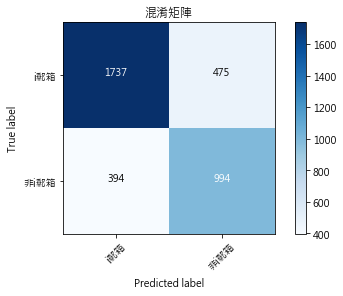

In [15]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
cnf=confusion_matrix(Yvalidation,lr.predict(X_validation_nor))
print('混淆矩陣: ',"\n",cnf)
print(classification_report(Yvalidation,lr.predict(X_validation_nor)))
print ("Accuracy: ",accuracy_score(Yvalidation,lr.predict(X_validation_nor)))                                                       
import itertools
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

目標2: SKlearn库感知器(perceptron) 

D:\anaconda\envs\python36\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


[0 0 1 ... 1 0 0]
              precision    recall  f1-score   support

           0       0.75      0.80      0.77      2212
           1       0.64      0.57      0.60      1388

   micro avg       0.71      0.71      0.71      3600
   macro avg       0.70      0.68      0.69      3600
weighted avg       0.71      0.71      0.71      3600

Accuracy:0.71
Confusion matrix, without normalization
[[1775  437]
 [ 601  787]]


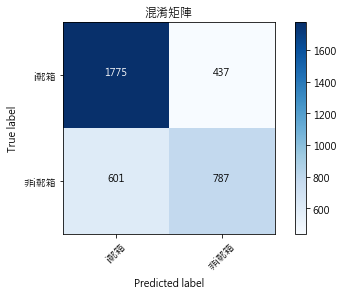

In [16]:
#https://blog.csdn.net/fjssharpsword/article/details/79061786
from sklearn.linear_model import Perceptron

ppn=Perceptron(n_iter=40,eta0=0.1,random_state=0)#迭代次数、学习速率、重排训练集
ppn.fit(X_train_nor,Ytrain)
y_pred=ppn.predict(X_validation_nor)
print (y_pred)
print(classification_report(Yvalidation,y_pred))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,y_pred))#准确率

cnf=confusion_matrix(Yvalidation,y_pred)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

#https://blog.csdn.net/fuqiuai/article/details/79495865
#https://medium.com/jameslearningnote/%E8%B3%87%E6%96%99%E5%88%86%E6%9E%90-%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E7%AC%AC3-5%E8%AC%9B-%E6%B1%BA%E7%AD%96%E6%A8%B9-decision-tree-%E4%BB%A5%E5%8F%8A%E9%9A%A8%E6%A9%9F%E6%A3%AE%E6%9E%97-random-forest-%E4%BB%8B%E7%B4%B9-7079b0ddfbda
#https://ithelp.ithome.com.tw/articles/10187569
目標3: 隨機森林決策樹

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      2212
           1       0.68      0.60      0.64      1388

   micro avg       0.74      0.74      0.74      3600
   macro avg       0.72      0.71      0.71      3600
weighted avg       0.73      0.74      0.73      3600

Accuracy:0.74
Confusion matrix, without normalization
[[1820  392]
 [ 559  829]]


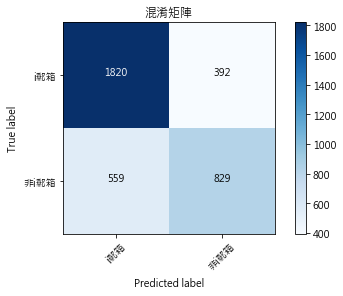

In [17]:
from sklearn import ensemble, preprocessing, metrics

forest = ensemble.RandomForestClassifier(n_estimators = 100)
forest_fit = forest.fit(X_train_nor, Ytrain)

# 預測
y_predicted = forest.predict(X_validation_nor)

# 績效
print(classification_report(Yvalidation,y_predicted))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,y_predicted))#准确率

cnf=confusion_matrix(Yvalidation,y_predicted)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

https://ithelp.ithome.com.tw/articles/10197110
目標4:K-近鄰演算法（K Nearest Neighbor）

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      2212
           1       0.68      0.59      0.63      1388

   micro avg       0.73      0.73      0.73      3600
   macro avg       0.72      0.70      0.71      3600
weighted avg       0.73      0.73      0.73      3600

Accuracy:0.73
Confusion matrix, without normalization
[[1823  389]
 [ 575  813]]


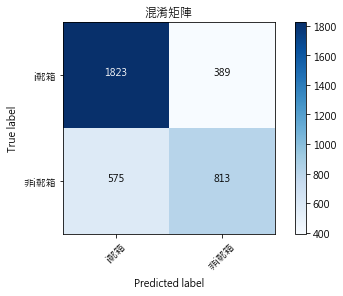

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5, weights = "distance")
knn.fit(X_train_nor, Ytrain)
y_predicted=knn.predict(X_validation_nor)

# 績效
print(classification_report(Yvalidation,y_predicted))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,y_predicted))#准确率

cnf=confusion_matrix(Yvalidation,y_predicted)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

[0.69479167 0.68770833 0.67895833 0.730625   0.72041667]


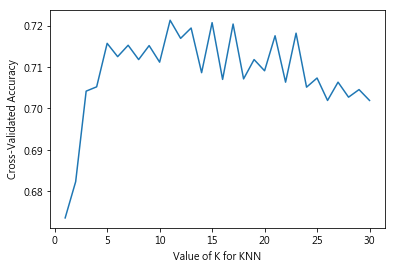

In [21]:
#from sklearn.cross_validation import cross_val_score # K折交叉验证模块

from sklearn.model_selection import cross_val_score

#使用K折交叉验证模块
scores = cross_val_score(knn, X,Y, cv=5, scoring='accuracy')

#将5次的预测准确率打印出
print(scores)

#建立测试参数集
k_range = range(1, 31)

k_scores = []

#藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,X,Y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

#可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2212
           1       0.70      0.59      0.64      1388

   micro avg       0.75      0.75      0.75      3600
   macro avg       0.74      0.72      0.72      3600
weighted avg       0.74      0.75      0.74      3600

Accuracy:0.75
Confusion matrix, without normalization
[[1867  345]
 [ 569  819]]


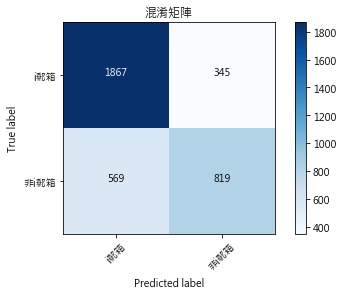

In [28]:
knn = KNeighborsClassifier(n_neighbors = 15, weights = "distance")
knn.fit(X_train_nor, Ytrain)
y_predicted=knn.predict(X_validation_nor)

# 績效
print(classification_report(Yvalidation,y_predicted))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,y_predicted))#准确率

cnf=confusion_matrix(Yvalidation,y_predicted)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

還沒做完的事:交叉驗證找出適合的k值

目標5:SVM

In [23]:
from sklearn.svm import SVC
model = SVC()

#使用Support Vector Classifier來建立模型
model.fit(X_train_nor, Ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [24]:
y_predicted = model.predict(X_validation_nor)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      2212
           1       0.68      0.73      0.71      1388

   micro avg       0.77      0.77      0.77      3600
   macro avg       0.75      0.76      0.76      3600
weighted avg       0.77      0.77      0.77      3600

Accuracy:0.77
Confusion matrix, without normalization
[[1734  478]
 [ 368 1020]]


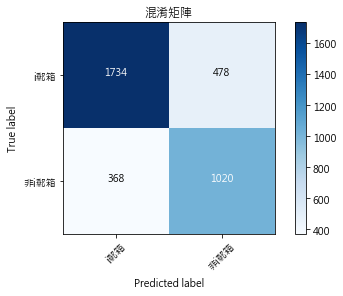

In [25]:
# 績效
print(classification_report(Yvalidation,y_predicted))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,y_predicted))#准确率

cnf=confusion_matrix(Yvalidation,y_predicted)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

還沒完成的事:交叉驗證找出參數

In [26]:
from sklearn.model_selection import GridSearchCV

#GridSearchCV是建立一個dictionary來組合要測試的參數
param_grid = {'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001]}

#GridSearchCV算是一個meta-estimator，參數中帶有estimator，像是SVC，重點是會創造一個新的estimator，但又表現的一模一樣。也就是estimator=SVC時，就是作為分類器
#Verbose可設定為任一整數，它只是代表數字越高，文字解釋越多
grid = GridSearchCV(SVC(),param_grid,verbose=3)

#利用剛剛設定的參數來找到最適合的模型
grid.fit(X_train_nor, Ytrain)

#顯示最佳參數組合
grid.best_params_

#顯示最佳estimator參數
grid.best_estimator_

#利用剛剛的最佳參數再重新預測測試組
grid_predictions = grid.predict(X_validation_nor)

#評估新參數的預測結果好壞
print(confusion_matrix(Yvalidation,grid_predictions))
print('\n')
print(classification_report(Yvalidation,grid_predictions))

D:\anaconda\envs\python36\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1 ..................................................
[CV] .......... C=0.1, gamma=1, score=0.766113194072487, total=   5.9s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.1s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.7680357142857143, total=   6.2s
[CV] C=0.1, gamma=1 ..................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   16.5s remaining:    0.0s


[CV] ......... C=0.1, gamma=1, score=0.7706733345240222, total=   6.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7712908409212641, total=   5.3s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7685714285714286, total=   5.0s
[CV] C=0.1, gamma=0.1 ................................................
[CV] ....... C=0.1, gamma=0.1, score=0.7713877478121093, total=   5.1s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ....... C=0.1, gamma=0.01, score=0.766113194072487, total=   5.3s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7619642857142858, total=   6.0s
[CV] C=0.1, gamma=0.01 ...............................................
[CV] ...... C=0.1, gamma=0.01, score=0.7715663511341311, total=   6.2s
[CV] C=0.1, gamma=0.001 ..............................................
[CV] .

[CV] ........ C=1000, gamma=1, score=0.7752187109444743, total= 2.8min
[CV] C=1000, gamma=1 .................................................
[CV] ................... C=1000, gamma=1, score=0.77125, total= 2.8min
[CV] C=1000, gamma=1 .................................................
[CV] ........ C=1000, gamma=1, score=0.7726379710662619, total= 2.2min
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7734333154793787, total=  45.1s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7710714285714285, total=  54.7s
[CV] C=1000, gamma=0.1 ...............................................
[CV] ...... C=1000, gamma=0.1, score=0.7721021611001965, total=  44.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] ..... C=1000, gamma=0.01, score=0.7732547759328692, total=  15.2s
[CV] C=1000, gamma=0.01 ..............................................
[CV] .

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 24.1min finished


[[1769  443]
 [ 397  991]]


              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2212
           1       0.69      0.71      0.70      1388

   micro avg       0.77      0.77      0.77      3600
   macro avg       0.75      0.76      0.76      3600
weighted avg       0.77      0.77      0.77      3600



              precision    recall  f1-score   support

           0       0.82      0.80      0.81      2212
           1       0.69      0.71      0.70      1388

   micro avg       0.77      0.77      0.77      3600
   macro avg       0.75      0.76      0.76      3600
weighted avg       0.77      0.77      0.77      3600

Accuracy:0.77
Confusion matrix, without normalization
[[1769  443]
 [ 397  991]]


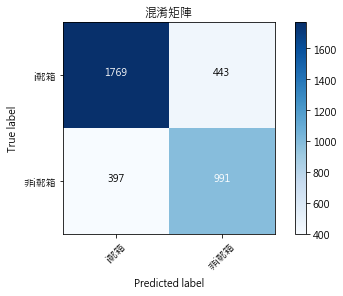

In [29]:

print(classification_report(Yvalidation,grid_predictions))
print ('Accuracy:%.2f' %accuracy_score(Yvalidation,grid_predictions))#准确率

cnf=confusion_matrix(Yvalidation,grid_predictions)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

最後:找出最好的模型->svm，找出來後，還必須用test data 去檢驗模型好壞

In [30]:
grid_predictions = grid.predict(X_test_nor)

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      2244
           1       0.68      0.69      0.69      1356

   micro avg       0.76      0.76      0.76      3600
   macro avg       0.75      0.75      0.75      3600
weighted avg       0.76      0.76      0.76      3600

Accuracy:0.76
Confusion matrix, without normalization
[[1813  431]
 [ 420  936]]


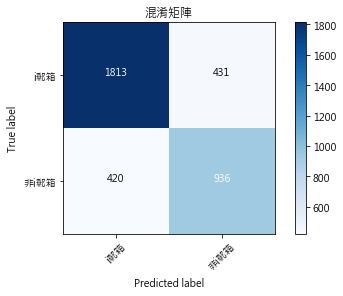

In [31]:
# 績效
print(classification_report(Ytest,grid_predictions))
print ('Accuracy:%.2f' %accuracy_score(Ytest,grid_predictions))#准确率

cnf=confusion_matrix(Ytest,grid_predictions)
target_name=['i郵箱','非i郵箱'] #是否生存 
plot_confusion_matrix(cnf,classes=target_name,title='混淆矩陣')
plt.show()

用test data可以知道svm的結果還不錯